In [86]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, f1_score, roc_auc_score

In [87]:
# Load the dataset
df = pd.read_csv('/content/Parkinsson disease.csv')

In [88]:
# Separate the features and the target variable
X = df.drop(['name', 'status'], axis=1)
y = df['status']

In [89]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Define pipeline for SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42, probability=True))  # 'probability=True' is required for ROC AUC
])


In [91]:
# Define parameter grids for hyperparameter tuning for SVM classifier
svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

In [92]:
# Perform GridSearchCV for SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'rbf']})

In [93]:
# Get best models from grid search
svm_clf = svm_grid_search.best_estimator_

# Print the Best parameters found for SVM
print("Best parameters found for SVM:", svm_grid_search.best_params_)

Best parameters found for SVM: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}


In [94]:
# Predict on the test set with both models
svm_y_pred = svm_clf.predict(X_test)
svm_proba = svm_clf.predict_proba(X_test)[:, 1]  # Get the probability for the positive class

In [95]:
# Calculate the performance metrics for both models
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_roc_auc = roc_auc_score(y_test, svm_proba)  # ROC AUC score

In [96]:
# Store metrics in dictionaries
svm_metrics = {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'F1-Score': svm_f1, 'ROC AUC': svm_roc_auc}

In [97]:
# Display accuracy numerically for SVM
svm_accuracy = svm_grid_search.best_score_
print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 0.890725806451613


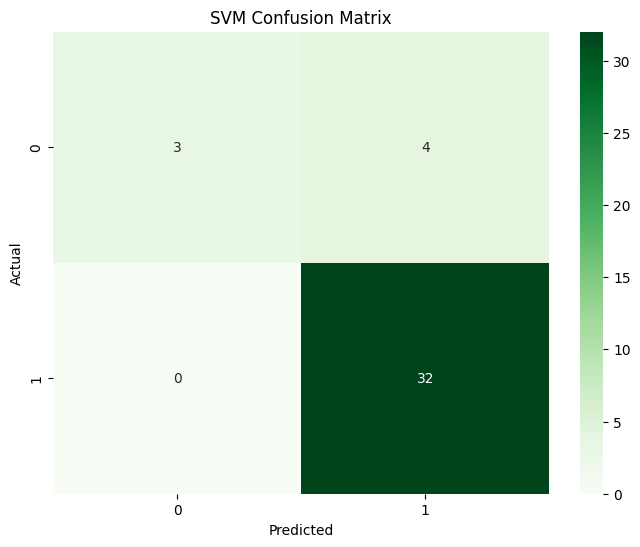

In [98]:
# Plot confusion matrix for SVM
svm_clf = svm_grid_search.best_estimator_
svm_y_pred = svm_clf.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [99]:
# Define pipeline for Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [100]:
# Define parameter grids for hyperparameter tuning for Random Forest classifier
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

In [101]:
# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]})

In [102]:
# Get best models from grid search
rf_clf = rf_grid_search.best_estimator_
# Print the Best parameters found for Random Forest
print("Best parameters found for Random Forest:", rf_grid_search.best_params_)

Best parameters found for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [103]:
# Predict on the test set with both models
rf_y_pred = rf_clf.predict(X_test)
rf_proba = rf_clf.predict_proba(X_test)[:, 1]  # Get the probability for the positive class


In [104]:
# Calculate the performance metrics for both models

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_proba)  # ROC AUC score

In [105]:
# Store metrics in dictionaries
rf_metrics = {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'F1-Score': rf_f1, 'ROC AUC': rf_roc_auc}

In [106]:
# Display accuracy numerically for Random Forest
rf_accuracy = rf_grid_search.best_score_
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.9163306451612904


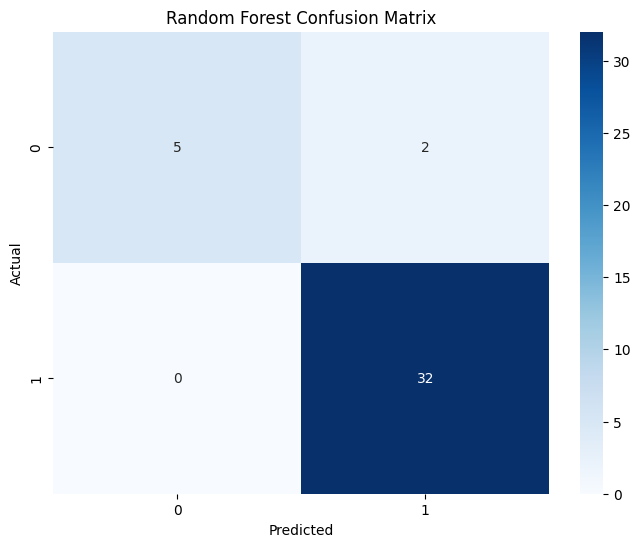

In [107]:
# Plot confusion matrix for Random Forest
rf_clf = rf_grid_search.best_estimator_
rf_y_pred = rf_clf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

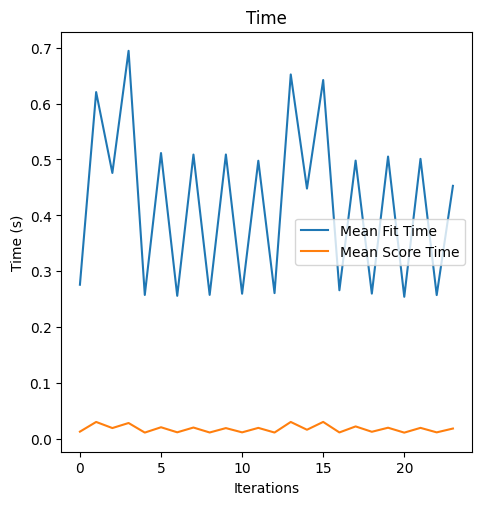

In [108]:
# For Random Forest
rf_metrics1 = rf_grid_search.cv_results_

plt.figure(figsize=(18, 12))

# Plotting available metrics for Random Forest
plt.subplot(2, 3, 1)
plt.plot(rf_metrics1['mean_fit_time'], label='Mean Fit Time')
plt.plot(rf_metrics1['mean_score_time'], label='Mean Score Time')
plt.xlabel('Iterations')
plt.ylabel('Time (s)')
plt.title('Time')
plt.legend()

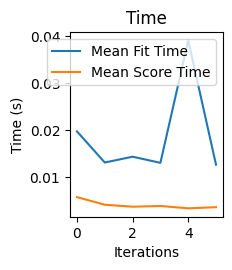

In [109]:
# For SVM
svm_metrics1 = svm_grid_search.cv_results_

# Plotting available metrics for SVM
plt.subplot(2, 3, 4)
plt.plot(svm_metrics1['mean_fit_time'], label='Mean Fit Time')
plt.plot(svm_metrics1['mean_score_time'], label='Mean Score Time')
plt.xlabel('Iterations')
plt.ylabel('Time (s)')
plt.title('Time')
plt.legend()

plt.tight_layout()
plt.show()

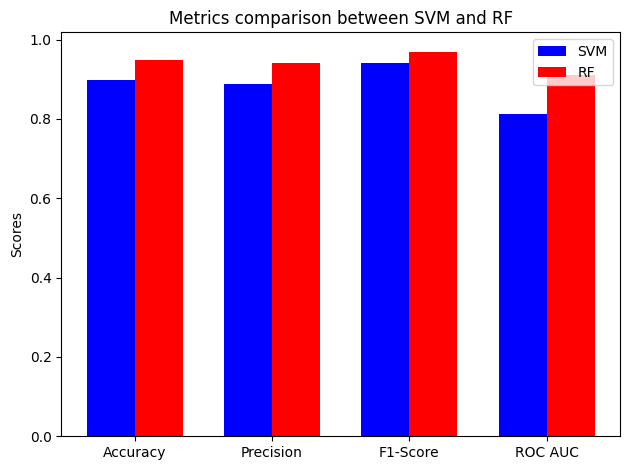

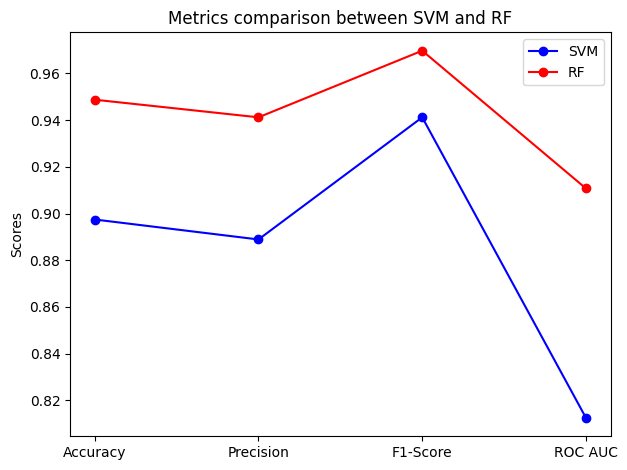

In [110]:

# Create lists of values and labels for the plot
metrics_labels = list(svm_metrics.keys())
svm_values = list(svm_metrics.values())
rf_values = list(rf_metrics.values())


# Define the x locations for the groups
ind = np.arange(len(metrics_labels))
# The width of the bars
width = 0.35

fig, ax = plt.subplots()
svm_bars = ax.bar(ind - width/2, svm_values, width, label='SVM', color='blue')
rf_bars = ax.bar(ind + width/2, rf_values, width, label='RF', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Metrics comparison between SVM and RF')
ax.set_xticks(ind)
ax.set_xticklabels(metrics_labels)
ax.legend()

fig.tight_layout()
plt.show()







# Plotting Scatterplot
x = list(range(len(metrics_labels)))

fig, ax = plt.subplots()

# Plot SVM metrics
svm_points = ax.plot(x, svm_values, 'o-', label='SVM', color='blue')

# Plot RF metrics
rf_points = ax.plot(x, rf_values, 'o-', label='RF', color='red')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Metrics comparison between SVM and RF')
ax.set_xticks(x)
ax.set_xticklabels(metrics_labels)
ax.legend()

fig.tight_layout()
plt.show()
